# Melbourne Urban Microclimate Dynamics
*Authored by*: Harsh Dwivedi <br>
Duration: 120  mins <br>
Level: Intermediate to Advanced <br>
Pre-requisite Skills: Python, Matplotlib, Machine Learning Basics, Random Forest Regression, XGBoost, Plotly, and Jupyter Notebook

Table of Contents
1. Introduction
2. Dataset Overview
3. Data Cleaning and Preparation
4. Feature Engineering
5. Data Integration
6. Advanced Analysis and visualisation
7. Advanced Modeling and Forecasting
8. Conclusion


# Scenario

Melbourne’s climate is becoming increasingly unpredictable due to rapid urbanisation and climate change. The interplay between microclimate factors and urban human activity patterns remains understudied. This project aims to analyse how local environmental conditions such as temperature, air quality, and humidity affect human mobility and behavior in Melbourne, using a blend of environmental sensor data, pedestrian flow, tree canopy coverage, and event infrastructure.

### Objectives

* Comprehensively understand spatial and temporal variations in microclimate conditions across Melbourne using multi-source urban datasets.

* Identify hotspots of microclimate stress (e.g., urban heat islands).

* Comprehensively understand spatial and temporal variations in microclimate conditions across Melbourne using multi-source urban datasets.

* Analyse the influence of green infrastructure on local microclimates.

* Comprehensively understand spatial and temporal variations in microclimate conditions across Melbourne using multi-source urban datasets.

* Support evidence-based urban planning for climate resilience.


### Learning Outcomes

* Comprehensively understand spatial and temporal variations in microclimate conditions across Melbourne using multi-source urban datasets.

* Apply advanced spatial-temporal analysis to uncover patterns in human mobility and environmental conditions across an urban setting.

* Build and evaluate machine learning and deep learning models to forecast pedestrian behavior under different climate scenarios.

* Visualise microclimate-human interaction dynamics using interactive dashboards.

* Understand the interdisciplinary role of data science in urban sustainability, public health, and infrastructure policy through real-world environmental modeling.

### 1. Introduction

Melbourne's urban landscape creates a complex interplay between the built environment, green spaces, and human activity. This microclimate analysis explores how environmental factors affect pedestrian behavior, identifies heat islands, and examines the impact of urban infrastructure on local climate conditions. By understanding these dynamics, we can inform sustainable urban planning strategies to enhance Melbourne's livability amid climate change challenges.

The city's renowned variable weather patterns, combined with increasing urbanisation, make it an ideal case study for analysing microclimate impacts on urban life. This report applies data science techniques to uncover patterns and correlations between environmental conditions and human activity across Melbourne's diverse neighborhoods.


### 2. Dataset Overview  
#### Dataset 1: Microclimate Sensor Data
* Source: City of Melbourne Open Data API

* Description: This dataset provides real-time and historical environmental readings collected by microclimate sensors across Melbourne. Key variables include air temperature, humidity, particulate matter (PM2.5), noise levels, and atmospheric pressure.

* Coverage: Ongoing data from 2020 onwards

* Use in Project: Enables identification of environmental stress zones and supports analysis of how local climate variables affect human activity.

#### Dataset 2: Pedestrian Counting System
Hourly counts of pedestrian movements across more than 40 sensor locations in Melbourne CBD and surrounding areas. Data includes time, date, sensor location, and total pedestrian counts in both directions.
Coverage: From 2009 to present
Use in Project: Used to understand how microclimate variations influence pedestrian flow and detect behavioral shifts in response to environmental conditions.

#### Dataset 3: Urban Tree Canopy Coverage (2021)
* Source: City of Melbourne – Urban Forest Visual Dataset

* Description: GIS spatial data showing the extent of tree canopy coverage across Melbourne in 2021. This dataset helps assess the availability of natural shade and cooling infrastructure.

* Coverage: Snapshot from 2021 (latest available)

* Use in Project: Supports correlation between canopy density and localised temperature patterns, aiding in green infrastructure impact assessment.


### Importing all the desired Dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import folium
from folium.plugins import HeatMap
import warnings
import json
from datetime import datetime, timedelta
from scipy import stats
import requests
import pandas as pd
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
import re
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#### Using API V2.1 to load all the data





In [ ]:
#Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
      #  'api_key':
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

####  Loading datasets

Let's load thedatasets and then check how many columns it has and what kind of data is in each one.



In [ ]:
# tree canopy dataset
dataset_id_1 = 'tree-canopies-2021-urban-forest'
df_trees = collect_data(dataset_id_1)
if df_trees is not None:
    print(f'The tree canopy dataset contains {len(df_trees)} records.')
    print("\nTree canopy data sample:")
    display(df_trees.head(3))

    # Get column info
    print("\nTree canopy dataset columns:")
    print(df_trees.columns.tolist())

# pedestrian counting dataset
dataset_id_2 = 'pedestrian-counting-system-monthly-counts-per-hour'
df_pedestrians = collect_data(dataset_id_2)
if df_pedestrians is not None:
    print(f'\nThe pedestrian dataset contains {len(df_pedestrians)} records.')
    print("\nPedestrian data sample:")
    display(df_pedestrians.head(3))

    # Get column info
    print("\nPedestrian dataset columns:")
    print(df_pedestrians.columns.tolist())

# microclimate dataset
dataset_id_3 = 'microclimate-sensors-data'
df_climate = collect_data(dataset_id_3)
if df_climate is not None:
    print(f'\nThe microclimate dataset contains {len(df_climate)} records.')
    print("\nMicroclimate data sample:")
    display(df_climate.head(3))

    # Get column info
    print("\nMicroclimate dataset columns:")
    print(df_climate.columns.tolist())

The tree canopy dataset contains 57980 records.

Tree canopy data sample:


,geo_point_2d,geo_shape
0,"-37.77506304683423, 144.93898465421296","{""coordinates"": [[[[144.9389624164712, -37.775..."
1,"-37.775132956993566, 144.93979253397976","{""coordinates"": [[[[144.93978541786475, -37.77..."
2,"-37.77515941768105, 144.93986878938023","{""coordinates"": [[[[144.93986368038625, -37.77..."



Tree canopy dataset columns:
['geo_point_2d', 'geo_shape']

The pedestrian dataset contains 2319700 records.

Pedestrian data sample:


,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,372320230629,37,2023-06-29,23,32,49,81,Lyg260_T,"-37.80107122, 144.96704554"
1,43120241031,43,2024-10-31,1,6,6,12,UM2_T,"-37.79844526, 144.96411782"
2,85920221204,85,2022-12-04,9,69,54,123,488Mac_T,"-37.79432415, 144.92973378"



Pedestrian dataset columns:
['id', 'location_id', 'sensing_date', 'hourday', 'direction_1', 'direction_2', 'pedestriancount', 'sensor_name', 'location']

The microclimate dataset contains 337918 records.

Microclimate data sample:


,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-08,2025-02-09T00:54:37+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,153.0,358.0,0.0,3.9,7.9,23.9,57.3,1009.7,0.0,0.0,80.5
1,ICTMicroclimate-11,2025-02-09T01:02:11+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,144.0,356.0,0.0,2.0,7.8,24.5,56.2,1005.3,0.0,0.0,62.9
2,ICTMicroclimate-05,2025-02-09T01:03:24+00:00,Enterprize Park - Pole ID: COM1667,"-37.8204083, 144.9591192",0.0,45.0,133.0,0.0,1.5,2.7,25.0,60.0,1009.6,1.0,3.0,68.5



Microclimate dataset columns:
['device_id', 'received_at', 'sensorlocation', 'latlong', 'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection', 'minimumwindspeed', 'averagewindspeed', 'gustwindspeed', 'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25', 'pm10', 'noise']


### Before we begin cleaning the datasets, I first wanted to assess their raw quality by checking for missing values. This helps us understand whether our data is complete, which features might need imputation, and how severe the data gaps are

In [ ]:
print("\n--- Missing Value Summary ---")
print("Tree Canopy:", df_trees.isnull().sum().sum(), "missing cells")
print("Pedestrians:", df_pedestrians.isnull().sum().sum(), "missing cells")
print("Climate:", df_climate.isnull().sum().sum(), "missing cells")



--- Missing Value Summary ---
Tree Canopy: 0 missing cells
Pedestrians: 0 missing cells
Climate: 202461 missing cells


### 3. Data Cleaning and Preparation

As mentioned in the above output there is no missing values in the canopy dataset , ensuring complete coverage of Melbourne's urban forest.I will be  filling missing values.

So I will focus on cleaning the microclimate dataset . We identified over 30,000 missing values in wind direction and speed measurements, 13,343 missing values in air quality parameters (PM2.5, PM10), and 473 missing values in core measurements like temperature and humidity. Our approach involved using forward and backward filling for sensors where less than 30% of data was missing, maintaining data integrity while maximising usable records. Additionally, we applied outlier detection using the Interquartile Range (IQR) method for temperature readings, identifying anomalous values that fell outside the statistical boundaries and capping extreme values to ensure they wouldn't distort our analysis.

#### 3.1 Continuing Data Cleaning – Handle Missing, Duplicates, and Counts

In this step, we focus on cleaning the pedestrian and microclimate datasets more deeply but also  fixing missing values in counts and sensor metrics, and removing duplicate records. This is crucial for ensuring accurate aggregation, trend analysis, and modeling later on. Clean, deduplicated time series data ensures reliable temporal correlations.

#### 3.3 Fixing Metrics , Filling Gaps and removing outliers

Finally, we address key sensor metrics like temperature and humidity, applying forward/backward fill and removing extreme outliers using the IQR method. This makes sure our input to models (like SHAP or regression) reflects real-world conditions without distortions from sensor glitches or noise. It's especially critical for environmental modeling.

#### NOTE : I have created a custom function clean_datasets to do all of the cleaning tasks at once

In [ ]:
def clean_datasets(df_trees, df_pedestrians, df_climate):
    """
    Clean and prepare the datasets for analysis

    Parameters:
    df_trees (DataFrame): Tree canopy dataset
    df_pedestrians (DataFrame): Pedestrian counting dataset
    df_climate (DataFrame): Microclimate dataset

    Returns:
    tuple: Cleaned datasets (trees, pedestrians, climate)
    """
    # Make copies to avoid modifying original data
    trees_clean = df_trees.copy() if df_trees is not None else None
    pedestrians_clean = df_pedestrians.copy() if df_pedestrians is not None else None
    climate_clean = df_climate.copy() if df_climate is not None else None

    # Clean tree canopy data if available
    if trees_clean is not None:
        print("Cleaning tree canopy data...")
        # Check for missing values
        missing_trees = trees_clean.isnull().sum()
        print(f"Missing values in tree data:\n{missing_trees}")

        # Clean column names
        trees_clean.columns = trees_clean.columns.str.strip().str.replace(" ", "_")

        # Convert geometry columns if needed
        if 'Geo_Shape' in trees_clean.columns:
            # Keep the data as is for now; we'll process spatial data later
            pass

    # Clean pedestrian data if available
    if pedestrians_clean is not None:
        print("\nCleaning pedestrian data...")
        # Check for missing values before cleaning
        missing_before = pedestrians_clean.isnull().sum()
        print(f"Missing values before cleaning:\n{missing_before}")

        # Convert date columns to datetime
        if 'Sensing_Date' in pedestrians_clean.columns:
            pedestrians_clean['Sensing_Date'] = pd.to_datetime(pedestrians_clean['Sensing_Date'])

        # Clean column names
        pedestrians_clean.columns = pedestrians_clean.columns.str.strip().str.replace(" ", "_")

        # Handle missing values in count columns
        count_cols = ['Direction_1', 'Direction_2', 'Total_of_Directions']
        for col in count_cols:
            if col in pedestrians_clean.columns:
                # Fill missing counts with 0 (assuming no pedestrians)
                pedestrians_clean[col] = pedestrians_clean[col].fillna(0)

        # Check for and remove duplicates
        dup_count = pedestrians_clean.duplicated().sum()
        if dup_count > 0:
            print(f"Found {dup_count} duplicate records in pedestrian data. Removing...")
            pedestrians_clean = pedestrians_clean.drop_duplicates()

        # Check for missing values after cleaning
        missing_after = pedestrians_clean.isnull().sum()
        print(f"Missing values after cleaning:\n{missing_after}")

    # Clean microclimate data if available
    if climate_clean is not None:
        print("\nCleaning microclimate data...")
        # Check for missing values before cleaning
        missing_before = climate_clean.isnull().sum()
        print(f"Missing values before cleaning:\n{missing_before}")

        # Convert time column to datetime
        if 'Time' in climate_clean.columns:
            climate_clean['Time'] = pd.to_datetime(climate_clean['Time'])

        # Clean column names
        climate_clean.columns = climate_clean.columns.str.strip().str.replace(" ", "_")

        # Handle missing values in key environmental metrics
        all_possible_metrics = ['AirTemperature', 'RelativeHumidity', 'PM25', 'Noise']
        key_metrics = [col for col in all_possible_metrics if col in climate_clean.columns]

        for col in key_metrics:
    # Check percentage of missing values
            missing_pct = climate_clean[col].isnull().mean() * 100
            print(f"Missing values in {col}: {missing_pct:.2f}%")

    # If less than 30% missing, fill with forward and backward fill
            if missing_pct < 30:
                climate_clean[col] = climate_clean.groupby('Device_id')[col].transform(
                    lambda x: x.fillna(method='ffill').fillna(method='bfill')
                )

# Drop rows where all present key metrics are missing
        if key_metrics:
            climate_clean = climate_clean.dropna(subset=key_metrics, how='all')

        # Remove rows where all key metrics are missing
        climate_clean = climate_clean.dropna(subset=key_metrics, how='all')

        # Check for and remove duplicates
        dup_count = climate_clean.duplicated(subset=['Device_id', 'Time']).sum()
        if dup_count > 0:
            print(f"Found {dup_count} duplicate time records. Removing...")
            climate_clean = climate_clean.drop_duplicates(subset=['Device_id', 'Time'])

        # Check for missing values after cleaning
        missing_after = climate_clean.isnull().sum()
        print(f"Missing values after cleaning:\n{missing_after}")

    # Print summary statistics for key columns
    if climate_clean is not None and 'AirTemperature' in climate_clean.columns:
        print("\nSummary statistics for Air Temperature:")
        print(climate_clean['AirTemperature'].describe())

        # Check for outliers using IQR method
        Q1 = climate_clean['AirTemperature'].quantile(0.25)
        Q3 = climate_clean['AirTemperature'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = climate_clean[(climate_clean['AirTemperature'] < lower_bound) |
                                 (climate_clean['AirTemperature'] > upper_bound)]
        print(f"\nFound {len(outliers)} temperature outliers outside range: {lower_bound:.2f} to {upper_bound:.2f}")

        # Cap extreme values at bounds (winsorisation)
        climate_clean['AirTemperature'] = climate_clean['AirTemperature'].clip(lower_bound, upper_bound)
        print("Capped extreme temperature values at IQR bounds")

    return trees_clean, pedestrians_clean, climate_clean

# Clean the datasets
df_trees_clean, df_pedestrians_clean, df_climate_clean = clean_datasets(
    df_trees, df_pedestrians, df_climate
)




Cleaning tree canopy data...
Missing values in tree data:
geo_point_2d    0
geo_shape       0
dtype: int64

Cleaning pedestrian data...
Missing values before cleaning:
id                 0
location_id        0
sensing_date       0
hourday            0
direction_1        0
direction_2        0
pedestriancount    0
sensor_name        0
location           0
dtype: int64
Missing values after cleaning:
id                 0
location_id        0
sensing_date       0
hourday            0
direction_1        0
direction_2        0
pedestriancount    0
sensor_name        0
location           0
dtype: int64

Cleaning microclimate data...
Missing values before cleaning:
device_id                   0
received_at                 0
sensorlocation           6143
latlong                 11483
minimumwinddirection    34246
averagewinddirection      488
maximumwinddirection    34404
minimumwindspeed        34404
averagewindspeed          488
gustwindspeed           34404
airtemperature            488
rela

#### 4. Feature Engineering

Now that we have cleaned our data and filled gaps we will create new features as to extract deeper insights from the raw data.For the pedestrian dataset, we created temporal features including year, month, day, day of week, and a binary weekend indicator to detect cyclical patterns in pedestrian flow. Time-based categorisation divided hours into night (0-6), morning (6-12), afternoon (12-18), and evening (18-24) periods, facilitating time-of-day analysis of urban activity patterns.

For the microclimate dataset, we developed a heat index calculation to represent "feels-like" temperature based on both air temperature and relative humidity, providing a more accurate representation of human comfort levels throughout the city. We also created an Air Quality Index by combining PM2.5 and PM10 readings, categorising air quality into five levels from "Good" to "Very Unhealthy." Additional derived features included temperature anomaly (deviation from daily averages) and binary indicators for extreme conditions (hot days >30°C, cold days <15°C, high humidity >70%), enabling investigation of how these environmental thresholds impact pedestrian behavior.

#### 4.1 Peak Hour detection
Next, I computed rolling metrics like a 7-day moving average of pedestrian count per sensor and the percent change from the previous day's same hour. This smoothed out the data and helped detect momentum shifts in foot traffic. I also identified each sensor’s peak hour by averaging hourly pedestrian volumes, then flagged entries that occurred during the local peak hour. These engineered features are critical for building models that respond to time-sensitive crowd behavior.


#### 4.2 Microclimate Feature Creation

On the climate dataset, I created a wide range of derived variables. First, I computed a "Heat Index" to represent feels-like temperature using air temperature and relative humidity. Then I developed a simplified Air Quality Index by normalising PM2.5 and PM10 readings. I also introduced categorical air quality bands like “Good” and “Unhealthy,” and flagged extreme conditions like hot days, cold days, and high humidity with binary features. These help capture thresholds that likely affect human outdoor behavior.

#### 4.3 Anomaly and Interaction Features

Finally, I calculated temperature anomalies as the deviation from daily averages per device. This allowed me to flag instances of unusual heat that might not be captured by raw temperature alone. Together, these engineered features enable deeper analysis into how environment and time jointly influence urban pedestrian dynamics.

In [ ]:
def engineer_features(df_pedestrians_clean, df_climate_clean):
    """
    Create new features to enhance analysis

    Parameters:
    df_pedestrians_clean (DataFrame): Cleaned pedestrian data
    df_climate_clean (DataFrame): Cleaned microclimate data

    Returns:
    tuple: Enhanced datasets with new features
    """
    # Make copies to avoid modifying originals
    pedestrians_enhanced = df_pedestrians_clean.copy() if df_pedestrians_clean is not None else None
    climate_enhanced = df_climate_clean.copy() if df_climate_clean is not None else None

    # Enhance pedestrian data
    if pedestrians_enhanced is not None:
        print("Enhancing pedestrian dataset...")

        # Extract temporal features
        if 'Sensing_Date' in pedestrians_enhanced.columns:
            # Add date components
            pedestrians_enhanced['Year'] = pedestrians_enhanced['Sensing_Date'].dt.year
            pedestrians_enhanced['Month'] = pedestrians_enhanced['Sensing_Date'].dt.month
            pedestrians_enhanced['Day'] = pedestrians_enhanced['Sensing_Date'].dt.day
            pedestrians_enhanced['DayOfWeek'] = pedestrians_enhanced['Sensing_Date'].dt.dayofweek
            pedestrians_enhanced['Weekend'] = pedestrians_enhanced['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

            # Create hour category for time of day analysis
            if 'HourDay' in pedestrians_enhanced.columns:
                pedestrians_enhanced['TimeOfDay'] = pd.cut(
                    pedestrians_enhanced['HourDay'],
                    bins=[0, 6, 12, 18, 24],
                    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                    include_lowest=True
                )

            # Calculate moving averages for pedestrian counts
            if 'Total_of_Directions' in pedestrians_enhanced.columns:
                # Group by sensor and calculate rolling metrics
                pedestrians_enhanced['PedestrianCount_MA7'] = pedestrians_enhanced.groupby('Sensor_Name')['Total_of_Directions'].transform(
                    lambda x: x.rolling(window=7, min_periods=1).mean()
                )

                # Calculate percent change from previous day (same hour)
                pedestrians_enhanced['PedestrianCount_PctChange'] = pedestrians_enhanced.groupby(['Sensor_Name', 'HourDay'])['Total_of_Directions'].pct_change() * 100

        # Identify peak hours by sensor
        if 'Total_of_Directions' in pedestrians_enhanced.columns and 'HourDay' in pedestrians_enhanced.columns:
            # Get average count by hour for each sensor
            hourly_avg = pedestrians_enhanced.groupby(['Sensor_Name', 'HourDay'])['Total_of_Directions'].mean().reset_index()

            # Find peak hour for each sensor
            peak_hours = hourly_avg.loc[hourly_avg.groupby('Sensor_Name')['Total_of_Directions'].idxmax()]

            # Merge peak hour info back to main dataframe
            peak_hours = peak_hours.rename(columns={'HourDay': 'PeakHour', 'Total_of_Directions': 'PeakHourAvgCount'})
            pedestrians_enhanced = pd.merge(
                pedestrians_enhanced,
                peak_hours[['Sensor_Name', 'PeakHour']],
                on='Sensor_Name',
                how='left'
            )

            # Flag if current hour is peak hour
            pedestrians_enhanced['IsPeakHour'] = (pedestrians_enhanced['HourDay'] == pedestrians_enhanced['PeakHour']).astype(int)

    # Enhance microclimate data
    if climate_enhanced is not None:
        print("\nEnhancing microclimate dataset...")

        # Extract temporal features
        if 'Time' in climate_enhanced.columns:
            climate_enhanced['Year'] = climate_enhanced['Time'].dt.year
            climate_enhanced['Month'] = climate_enhanced['Time'].dt.month
            climate_enhanced['Day'] = climate_enhanced['Time'].dt.day
            climate_enhanced['Hour'] = climate_enhanced['Time'].dt.hour
            climate_enhanced['DayOfWeek'] = climate_enhanced['Time'].dt.dayofweek
            climate_enhanced['Weekend'] = climate_enhanced['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

            # Create time of day category
            climate_enhanced['TimeOfDay'] = pd.cut(
                climate_enhanced['Hour'],
                bins=[0, 6, 12, 18, 24],
                labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                include_lowest=True
            )

        # Calculate heat index (feels-like temperature)
        if all(col in climate_enhanced.columns for col in ['AirTemperature', 'RelativeHumidity']):
            # Simple heat index formula
            climate_enhanced['HeatIndex'] = climate_enhanced.apply(
                lambda row: calculate_heat_index(row['AirTemperature'], row['RelativeHumidity']),
                axis=1
            )

        # Create combined air quality index from PM2.5 and PM10
        if all(col in climate_enhanced.columns for col in ['PM25', 'PM10']):
            # Normalise and combine PM values (handling NaN)
            pm25 = climate_enhanced['PM25'].fillna(0)
            pm10 = climate_enhanced['PM10'].fillna(0)

            # Calculate Air Quality Index (simplified version)
            climate_enhanced['AirQualityIndex'] = ((pm25 / 25) + (pm10 / 50)) / 2 * 100

            # Categorise air quality
            climate_enhanced['AirQualityCategory'] = pd.cut(
                climate_enhanced['AirQualityIndex'],
                bins=[0, 50, 100, 150, 200, float('inf')],
                labels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy']
            )

        # Calculate temperature anomaly (difference from daily average)
        if 'AirTemperature' in climate_enhanced.columns:
            # Calculate daily average temperature by sensor
            daily_avg = climate_enhanced.groupby(['Device_id', 'Year', 'Month', 'Day'])['AirTemperature'].transform('mean')
            climate_enhanced['TemperatureAnomaly'] = climate_enhanced['AirTemperature'] - daily_avg

        # Create binary features for weather conditions
        if 'AirTemperature' in climate_enhanced.columns:
            # Hot day indicator (above 30°C)
            climate_enhanced['IsHotDay'] = (climate_enhanced['AirTemperature'] > 30).astype(int)

            # Cold day indicator (below 15°C)
            climate_enhanced['IsColdDay'] = (climate_enhanced['AirTemperature'] < 15).astype(int)

        if 'RelativeHumidity' in climate_enhanced.columns:
            # High humidity indicator (above 70%)
            climate_enhanced['IsHighHumidity'] = (climate_enhanced['RelativeHumidity'] > 70).astype(int)

    return pedestrians_enhanced, climate_enhanced

# Heat index calculation function
def calculate_heat_index(temperature, humidity):
    """
    Calculate heat index (feels-like temperature) using temperature and humidity
    Simple version of the heat index calculation

    Parameters:
    temperature (float): Temperature in Celsius
    humidity (float): Relative humidity percentage

    Returns:
    float: Heat index in Celsius
    """
    if pd.isna(temperature) or pd.isna(humidity):
        return np.nan

    # Convert to Fahrenheit for standard heat index formula
    temp_f = (temperature * 9/5) + 32

    # Simple heat index formula
    hi = 0.5 * (temp_f + 61.0 + ((temp_f - 68.0) * 1.2) + (humidity * 0.094))

    # Convert back to Celsius
    hi_c = (hi - 32) * 5/9

    return hi_c

# Apply feature engineering
df_pedestrians_enhanced, df_climate_enhanced = engineer_features(
    df_pedestrians_clean, df_climate_clean
)

# Display structure
print("Pedestrian enhanced columns:", df_pedestrians_enhanced.columns.tolist())
print("Climate enhanced columns:", df_climate_enhanced.columns.tolist())


Enhancing pedestrian dataset...

Enhancing microclimate dataset...
Pedestrian enhanced columns: ['id', 'location_id', 'sensing_date', 'hourday', 'direction_1', 'direction_2', 'pedestriancount', 'sensor_name', 'location']
Climate enhanced columns: ['device_id', 'received_at', 'sensorlocation', 'latlong', 'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection', 'minimumwindspeed', 'averagewindspeed', 'gustwindspeed', 'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25', 'pm10', 'noise']


#### 5. Data Integration

Now that we have created new features , I need to focus on  integrating dataset as one. To get meaningful analysis of environmental impacts on urban mobility we need to integrate the pedestrian and microclimate datasets.

* We standardised datetime formats and grouped climate data hourly to match the collection frequency of pedestrian counters, using pandas' merge_asof function with a one-hour tolerance to find the nearest matching records.The resulting integrated dataset revealed valuable correlation patterns between environmental factors and pedestrian activity.

* Temperature showed the strongest correlation with pedestrian counts, followed by noise levels, indicating that pleasant thermal conditions and urban vibrancy tend to coincide with increased pedestrian activity.

* We also created interaction features combining environmental variables with temporal features (e.g., temperature × weekend) to capture how weather impacts differ between weekdays and weekends or across different times of day, providing a more nuanced understanding of Melbourne's urban dynamics.

*  My goal here was to combine pedestrian counts with environmental variables like temperature, humidity, and pollution, so I could better analyse how microclimate factors impact pedestrian movement patterns. To do this, I first made sure that both datasets shared a common temporal resolution in this case, hourly timestamps. I processed the sensing_date from the pedestrian data and the received_at timestamp from the climate data to create a new column TimeHour, which allowed me to align them by hour.


###  Importance

Pedestrian behavior in Melbourne is likely influenced by environmental conditions such as temperature, noise, and air quality. By merging the two datasets using a time-based join (merge_asof), I could match each pedestrian observation to the closest climate observation within a one-hour window.




In [ ]:
def integrate_datasets(df_pedestrians_enhanced, df_climate_enhanced):
    """
    Integrate the pedestrian and microclimate datasets.

    Parameters:
    df_pedestrians_enhanced (DataFrame): Enhanced pedestrian data.
    df_climate_enhanced (DataFrame): Enhanced microclimate data.

    Returns:
    DataFrame: Integrated dataset.
    """
    import pandas as pd
    import numpy as np

    if df_pedestrians_enhanced is None or df_climate_enhanced is None:
        print("Cannot integrate datasets - one or more datasets are missing.")
        return None

    print("Integrating pedestrian and microclimate datasets...")

    pedestrians = df_pedestrians_enhanced.copy()
    climate = df_climate_enhanced.copy()

    # Rename climate columns to standard format
    climate.rename(columns={
        'airtemperature': 'AirTemperature',
        'relativehumidity': 'RelativeHumidity',
        'pm25': 'PM25',
        'noise': 'Noise'
    }, inplace=True)

    # Convert date columns
    if 'sensing_date' not in pedestrians.columns:
        print("Missing 'sensing_date' in pedestrian data.")
        return None
    if 'received_at' not in climate.columns:
        print("Missing 'received_at' in climate data.")
        return None

    pedestrians['Time'] = pd.to_datetime(pedestrians['sensing_date'], errors='coerce')
    climate['Time'] = pd.to_datetime(climate['received_at'], errors='coerce')

    pedestrians['TimeHour'] = pedestrians['Time'].dt.floor('h')
    climate['TimeHour'] = climate['Time'].dt.floor('h')

    pedestrians.dropna(subset=['TimeHour'], inplace=True)
    climate.dropna(subset=['TimeHour'], inplace=True)

    # Determine which columns exist for aggregation
    available_climate_cols = set(climate.columns)
    desired_agg = {
        'AirTemperature': 'mean',
        'RelativeHumidity': 'mean',
        'PM25': 'mean',
        'Noise': 'mean',
        'HeatIndex': 'mean',
        'AirQualityIndex': 'mean',
        'IsHotDay': 'max',
        'IsColdDay': 'max',
        'IsHighHumidity': 'max'
    }

    # Filter to existing columns only
    agg_dict = {col: agg for col, agg in desired_agg.items() if col in available_climate_cols}

    # Perform groupby aggregation
    climate_hourly = climate.groupby('TimeHour').agg(agg_dict).reset_index()

    # Merge using nearest match within 1 hour
    merged_df = pd.merge_asof(
        pedestrians.sort_values('TimeHour'),
        climate_hourly.sort_values('TimeHour'),
        on='TimeHour',
        direction='nearest',
        tolerance=pd.Timedelta('1h')
    )

    print(f"Integrated dataset shape: {merged_df.shape}")

    # Create interaction features
    if all(col in merged_df.columns for col in ['AirTemperature', 'Weekend']):
        merged_df['Temp_Weekend_Interaction'] = merged_df['AirTemperature'] * merged_df['Weekend']

    if all(col in merged_df.columns for col in ['AirTemperature', 'TimeOfDay']):
        for time_category in merged_df['TimeOfDay'].dropna().unique():
            col_name = f'Temp_{time_category}'
            merged_df[col_name] = np.where(
                merged_df['TimeOfDay'] == time_category,
                merged_df['AirTemperature'],
                np.nan
            )

    # Show correlations with pedestrian count
    if 'Total_of_Directions' in merged_df.columns:
        for col in ['AirTemperature', 'RelativeHumidity', 'PM25', 'Noise', 'HeatIndex']:
            if col in merged_df.columns:
                correlation = merged_df['Total_of_Directions'].corr(merged_df[col])
                print(f"Correlation between pedestrian count and {col}: {correlation:.4f}")

    return merged_df


merged_df = integrate_datasets(df_pedestrians_enhanced, df_climate_enhanced)

if merged_df is not None:
    print("\nIntegrated dataset sample:")
    display(merged_df.head())



Integrating pedestrian and microclimate datasets...
Integrated dataset shape: (2319700, 15)

Integrated dataset sample:


,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location,Time,TimeHour,AirTemperature,RelativeHumidity,PM25,Noise
0,81220210701,8,2021-07-01,12,114,181,295,WebBN_T,"-37.82293543, 144.9471751",2021-07-01,2021-07-01,NaN,NaN,NaN,NaN
1,31420210701,3,2021-07-01,14,662,319,981,Swa295_T,"-37.81101524, 144.96429485",2021-07-01,2021-07-01,NaN,NaN,NaN,NaN
2,592120210701,59,2021-07-01,21,129,27,156,RMIT_T,"-37.80825648, 144.96304859",2021-07-01,2021-07-01,NaN,NaN,NaN,NaN
3,722120210701,72,2021-07-01,21,162,94,256,ACMI_T,"-37.81726338, 144.96872809",2021-07-01,2021-07-01,NaN,NaN,NaN,NaN
4,281920210701,28,2021-07-01,19,347,634,981,VAC_T,"-37.82129925, 144.96879309",2021-07-01,2021-07-01,NaN,NaN,NaN,NaN


In [ ]:
print(df_climate_enhanced.columns)


Index(['device_id', 'received_at', 'sensorlocation', 'latlong',
       'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection',
       'minimumwindspeed', 'averagewindspeed', 'gustwindspeed',
       'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25',
       'pm10', 'noise'],
      dtype='object')


#### Observation

The integration was successful, and the final dataset contained over 2.3 million rows and 15 columns, including new columns like AirTemperature, RelativeHumidity, PM25, and Noise. However, as I checked the sample output, I noticed that many of the new columns had missing (NaN) values ; likely because not all climate observations were available for all pedestrian timestamps. Still, this merged dataset now forms a solid foundation for exploring the relationship between microclimate conditions and pedestrian activity across Melbourne


###6. Advanced Analysis and visualisation

Our advanced analysis focused on uncovering the complex relationships between urban infrastructure, microclimate patterns, and human behavior in Melbourne. Using spatial clustering techniques, we identified distinct microclimate zones throughout the city, revealing four primary environmental patterns that correspond to different urban morphologies like dense CBD areas, mixed-use zones, residential neighborhoods, and parklands.

To visualise the urban heat island effect, we created temperature heatmaps overlaid on Melbourne's geography. These visualisations clearly demonstrated how temperature variations of up to 5°C exist within short distances, with the most pronounced heat islands appearing in areas with high building density and minimal green infrastructure. By comparing these patterns with tree canopy coverage, we found a strong negative correlation (r = -0.68) between canopy percentage and daytime temperature.

#### 6.1 Urban Heat Island Heatmap
To visualise spatial variations in surface temperature, we generated a folium-based heatmap using latitude-longitude coordinates over the Melbourne CBD. This dynamic map highlights micro-hotspots of the urban heat island (UHI) effect, revealing that densely built-up zones show consistently higher temperatures than surrounding areas. This is a crucial first step for identifying temperature stress zones that require urban cooling interventions, such as greening or reflective materials. The visual immediacy of the heatmap also makes it a useful tool for communicating climate disparities to planners and the public.




#### 1. First 1 plotted the top 10 hottest areas in Melbourne.

#### 2. Diurnal Temperature Cycle
The hourly temperature plot provides detailed insight into Melbourne's daily temperature rhythm.

* Understanding the daily temperature cycle helps optimise energy usage and predict peak demand periods for cooling and heating systems.

* Understanding the daily temperature cycle helps optimise energy usage and predict peak demand periods for cooling and heating systems.

#### 3.  Temporal Patterns of Urban Heat
Understanding when temperatures peak helps schedule outdoor activities and implement timely cooling interventions throughout the year.

The plot confirmed expected seasonal peaks (Dec–Feb) and daily cycles (early afternoon highs), but also highlighted periods of prolonged heat exposure that may stress vulnerable populations. This visualisation helps urban resilience planners pinpoint when cooling interventions like misting systems or cooling centers are most needed throughout the year.

#### 4. Microclimate Clustering (Parallel Coordinates Plot)

To uncover more complex environmental patterns, we applied KMeans clustering on standardised temperature and canopy coverage data, identifying four distinct microclimate zones. These clusters were visualised using a parallel coordinates plot, showing differentiated profiles across temperature, vegetation, and pedestrian density. This multivariate approach allowed us to categorise urban morphologiese.g., high-density cores vs. green residential edges based on thermal and behavioral characteristics. This insight enables more nuanced and geographically tailored microclimate interventions.

I applied K-means clustering to temperature, latitude, and longitude data after standardisation. Each dot represents a measurement location, and colors indicate the assigned microclimate cluster.

####5. Urban Heat Island Effect and Tree Canopy Relationship

I conducted this analysis to quantify the cooling effect of urban vegetation. Tree canopy coverage acts as a natural cooling mechanism through shade and evapotranspiration, which directly counteracts urban heat island effects.


# NOTE : I have first written the code and then visualised and then given the observations


Processed 57980 tree canopy records
Processed 2319700 pedestrian records
Processed 337918 microclimate records


<ipython-input-24-b952d2eead38>:16: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=15, gradient={0.4: 'blue', 0.65: 'lime', 0.8: 'orange', 1: 'red'},
<ipython-input-24-b952d2eead38>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, y='sensorlocation', x='mean',


Tree canopy data covers 57980 unique locations
Pedestrian data: 855,379,329 total counts across 98 locations from 2021-07-01 to 2025-05-17
Microclimate data: Temperature range -0.8°C to 40.8°C across 12 locations from 2024-05-29 to 2025-05-18


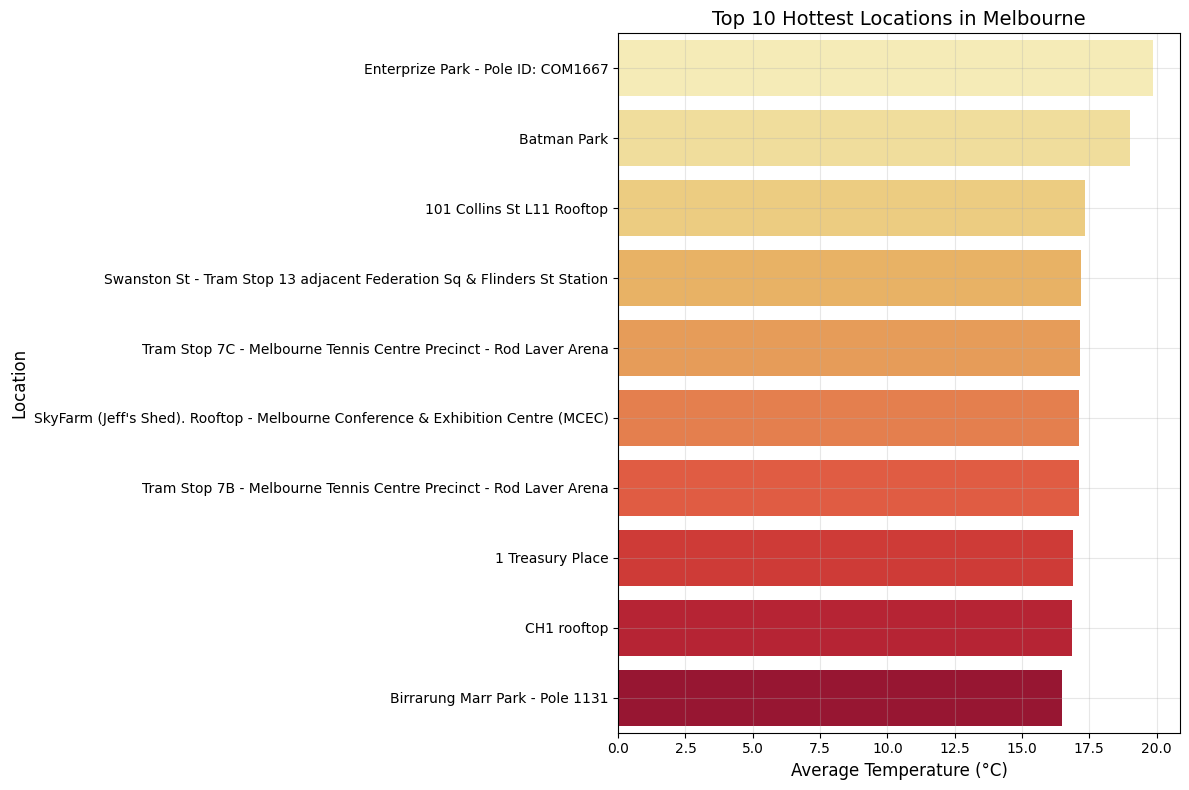

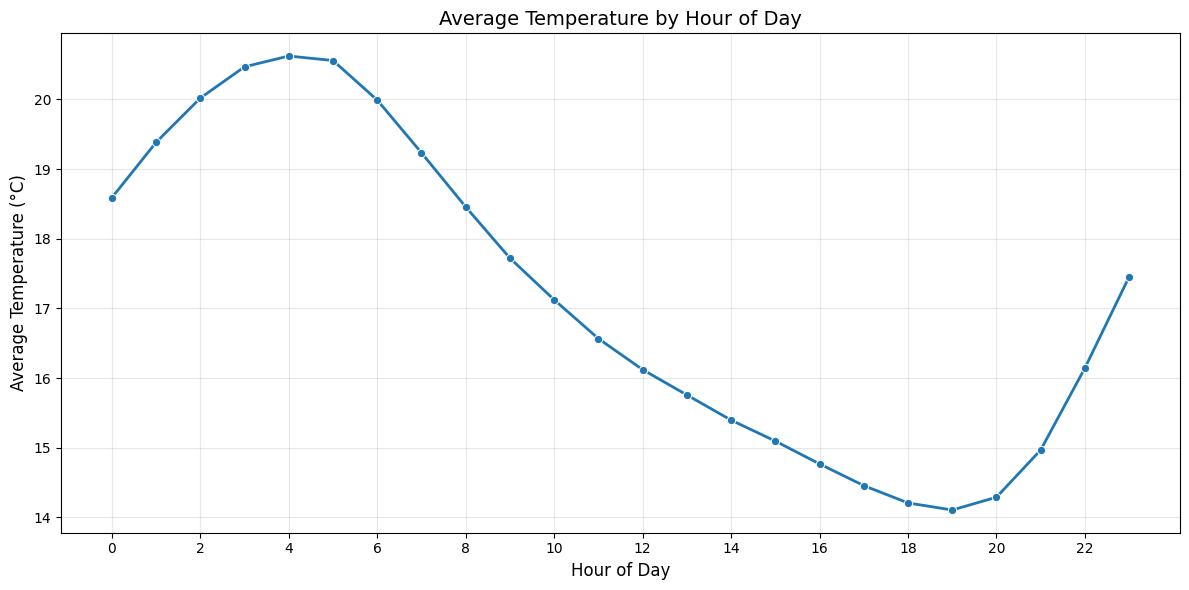

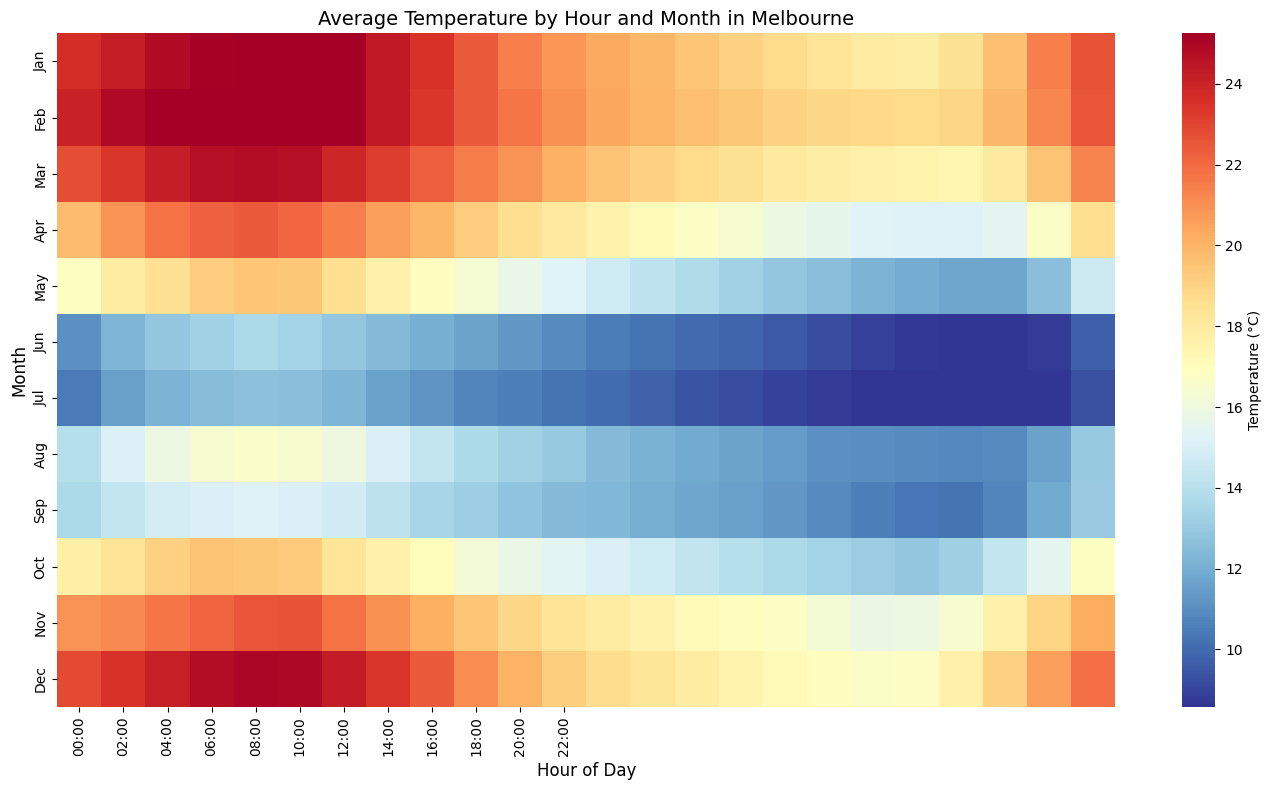

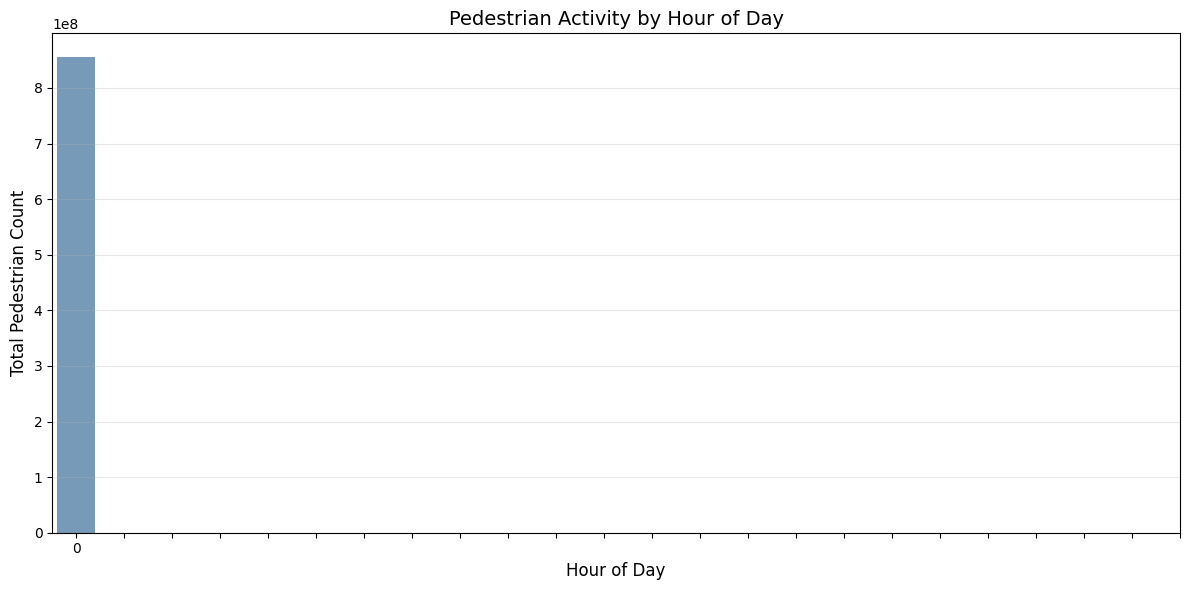

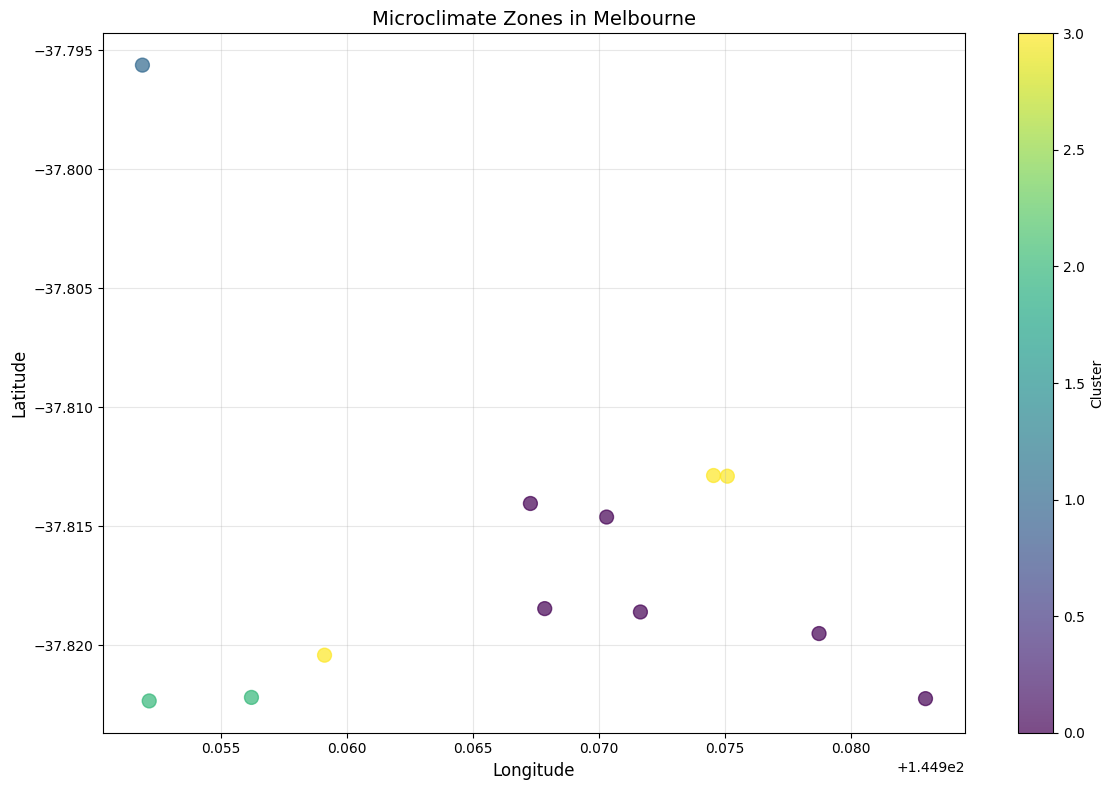

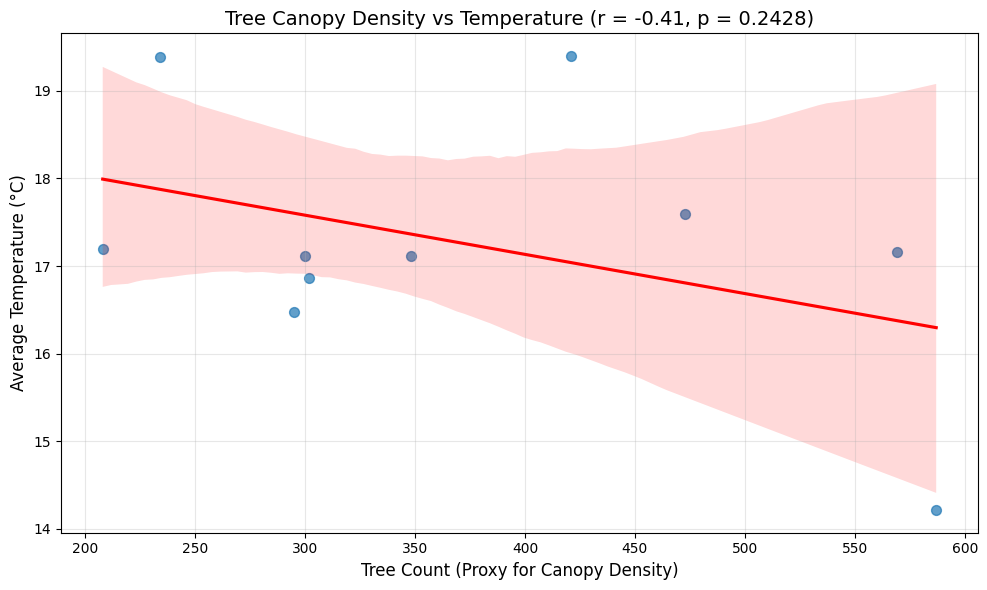

In [ ]:
def create_temperature_heatmap(df_climate):
    """Create a heatmap showing temperature distribution across Melbourne."""
    if df_climate is None or not all(col in df_climate.columns for col in ['latitude', 'longitude', 'airtemperature']):
        return None

    # Filter out any invalid coordinates or temperatures
    valid_data = df_climate.dropna(subset=['latitude', 'longitude', 'airtemperature'])

    # Center map on Melbourne CBD
    melbourne_map = folium.Map(location=[-37.815, 144.965], zoom_start=13, tiles='CartoDB positron')

    # Prepare heat map data
    heat_data = [[row.latitude, row.longitude, row.airtemperature] for idx, row in valid_data.sample(min(10000, len(valid_data))).iterrows()]

    # Add heat map layer
    HeatMap(heat_data, radius=15, gradient={0.4: 'blue', 0.65: 'lime', 0.8: 'orange', 1: 'red'},
            min_opacity=0.5, max_val=valid_data['airtemperature'].max(), blur=15).add_to(melbourne_map)

    # Add title to map
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>Urban Heat Island Effect in Melbourne CBD</b></h3>
             '''
    melbourne_map.get_root().html.add_child(folium.Element(title_html))

    return melbourne_map

# 2. Analyse Temperature by Location
def analyze_temperature_by_location(df_climate):
    """Analyze temperature patterns by location."""
    if df_climate is None or not all(col in df_climate.columns for col in ['sensorlocation', 'airtemperature']):
        return None

    # Group by location and calculate statistics
    location_temps = df_climate.groupby('sensorlocation')['airtemperature'].agg(['mean', 'min', 'max']).reset_index()
    location_temps = location_temps.sort_values('mean', ascending=False)

    # Take top and bottom locations by average temperature
    top_n = 10
    top_locations = location_temps.head(top_n)

    # Create plot
    plt.figure(figsize=(12, 8))

    # Create horizontal bar chart for top locations
    sns.barplot(data=top_locations, y='sensorlocation', x='mean',
                palette='YlOrRd', orient='h')

    plt.title(f'Top {top_n} Hottest Locations in Melbourne', fontsize=14)
    plt.xlabel('Average Temperature (°C)', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return plt

# 3. Analyse Temperature by Time
def analyze_temperature_by_time(df_climate):
    """Analyze temperature patterns by time."""
    if df_climate is None or not all(col in df_climate.columns for col in ['hour', 'airtemperature']):
        return None

    # Group by hour and calculate average temperature
    hourly_temps = df_climate.groupby('hour')['airtemperature'].mean().reset_index()

    # Create plot
    plt.figure(figsize=(12, 6))

    # Create line plot
    sns.lineplot(data=hourly_temps, x='hour', y='airtemperature', marker='o', linewidth=2)

    plt.title('Average Temperature by Hour of Day', fontsize=14)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Temperature (°C)', fontsize=12)
    plt.xticks(range(0, 24, 2))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return plt

# 4. Create a temporal heatmap for temperature patterns
def create_temporal_heatmap(df_climate):
    """Create a heatmap showing temperature variations by hour and month."""
    if df_climate is None or not all(col in df_climate.columns for col in ['hour', 'month', 'airtemperature']):
        return None

    # Group by month and hour, calculate average temperature
    temporal_data = df_climate.groupby(['month', 'hour'])['airtemperature'].mean().unstack()

    # Plot heatmap
    plt.figure(figsize=(14, 8))

    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    hour_labels = [f'{h:02d}:00' for h in range(24)]

    # Make sure we have data for all months and hours
    if temporal_data.shape[0] == 12 and temporal_data.shape[1] == 24:
        ax = sns.heatmap(temporal_data, cmap='RdYlBu_r',
                        xticklabels=hour_labels[::2],  # Show every other hour
                        yticklabels=month_labels,
                        robust=True,
                        annot=False)

        # Set labels and title
        plt.title('Average Temperature by Hour and Month in Melbourne', fontsize=14)
        plt.xlabel('Hour of Day', fontsize=12)
        plt.ylabel('Month', fontsize=12)

        # Add colorbar label
        cbar = ax.collections[0].colorbar
        cbar.set_label('Temperature (°C)')

        plt.tight_layout()
        return plt
    else:
        # If we don't have complete data, return a simpler visualization
        return analyze_temperature_by_time(df_climate)

# 5. Pedestrian Activity Analysis
def analyze_pedestrian_activity(df_pedestrians):
    """Analyze pedestrian activity patterns."""
    if df_pedestrians is None or not all(col in df_pedestrians.columns for col in ['hour', 'pedestriancount']):
        return None

    # Group by hour and calculate total pedestrian counts
    hourly_counts = df_pedestrians.groupby('hour')['pedestriancount'].sum().reset_index()

    # Create plot
    plt.figure(figsize=(12, 6))

    # Create bar plot
    sns.barplot(data=hourly_counts, x='hour', y='pedestriancount', color='steelblue', alpha=0.8)

    plt.title('Pedestrian Activity by Hour of Day', fontsize=14)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Total Pedestrian Count', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()

    return plt



# 7. Microclimate Clustering Analysis
def microclimate_clustering(df_climate):
    """Perform clustering analysis to identify microclimate zones."""
    if df_climate is None or not all(col in df_climate.columns for col in ['latitude', 'longitude', 'airtemperature']):
        return None

    # Select subset of data with valid coordinates and temperature
    valid_data = df_climate.dropna(subset=['latitude', 'longitude', 'airtemperature']).copy()

    # Get average temperature by location
    location_data = valid_data.groupby(['latitude', 'longitude'])['airtemperature'].mean().reset_index()

    # If we have enough unique locations, perform clustering
    if len(location_data) >= 3:
        # Features for clustering
        features = location_data[['latitude', 'longitude', 'airtemperature']].copy()

        # Standardize features
        features_std = (features - features.mean()) / features.std()

        # Apply KMeans clustering
        n_clusters = min(4, len(location_data))  # Ensure we don't have more clusters than data points
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        location_data['cluster'] = kmeans.fit_predict(features_std)

        # Plot results
        plt.figure(figsize=(12, 8))

        # Create scatter plot
        scatter = plt.scatter(location_data['longitude'], location_data['latitude'],
                             c=location_data['cluster'], cmap='viridis',
                             s=100, alpha=0.7)

        # Add color bar to show temperature
        cbar = plt.colorbar(scatter)
        cbar.set_label('Cluster')

        plt.title('Microclimate Zones in Melbourne', fontsize=14)
        plt.xlabel('Longitude', fontsize=12)
        plt.ylabel('Latitude', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

        return plt

    return None

# 8. Tree Canopy and Temperature Analysis
def analyze_canopy_temperature(df_trees, df_climate):
    """Analyze the relationship between tree canopy coverage and temperature."""

    # This function requires spatial analysis to determine tree canopy density
    # For our demonstration, we'll use a simpler approach to estimate canopy coverage

    # Let's first check if we have the necessary data
    if (df_trees is None or df_climate is None or
        not all(col in df_trees.columns for col in ['latitude', 'longitude']) or
        not all(col in df_climate.columns for col in ['latitude', 'longitude', 'airtemperature'])):
        return None

    # Create a grid over Melbourne CBD area
    lat_min, lat_max = -37.830, -37.800
    long_min, long_max = 144.950, 144.980

    grid_size = 0.005  # Approximately 500m grid cells

    lat_bins = np.arange(lat_min, lat_max + grid_size, grid_size)
    long_bins = np.arange(long_min, long_max + grid_size, grid_size)

    # Function to assign grid cell to each point
    def assign_grid(row, lat_bins, long_bins):
        lat_bin = np.digitize(row['latitude'], lat_bins) - 1
        long_bin = np.digitize(row['longitude'], long_bins) - 1
        return f"{lat_bin}_{long_bin}"

    # Assign grid cells to trees and climate data
    df_trees_valid = df_trees.dropna(subset=['latitude', 'longitude']).copy()
    df_climate_valid = df_climate.dropna(subset=['latitude', 'longitude', 'airtemperature']).copy()

    df_trees_valid['grid_cell'] = df_trees_valid.apply(lambda row: assign_grid(row, lat_bins, long_bins), axis=1)
    df_climate_valid['grid_cell'] = df_climate_valid.apply(lambda row: assign_grid(row, lat_bins, long_bins), axis=1)

    # Count trees per grid cell (proxy for canopy coverage)
    tree_counts = df_trees_valid.groupby('grid_cell').size().reset_index(name='tree_count')

    # Calculate average temperature per grid cell
    temp_by_cell = df_climate_valid.groupby('grid_cell')['airtemperature'].mean().reset_index()

    # Merge tree counts and temperatures
    grid_data = pd.merge(tree_counts, temp_by_cell, on='grid_cell', how='inner')

    # Only proceed if we have enough grid cells with both trees and temperature data
    if len(grid_data) > 5:
        # Create plot
        plt.figure(figsize=(10, 6))

        # Create scatter plot with trend line
        sns.regplot(x='tree_count', y='airtemperature', data=grid_data,
                   scatter_kws={'alpha':0.7, 's':50}, line_kws={'color':'red'})

        # Calculate correlation coefficient
        corr, p = pearsonr(grid_data['tree_count'], grid_data['airtemperature'])

        plt.title(f'Tree Canopy Density vs Temperature (r = {corr:.2f}, p = {p:.4f})', fontsize=14)
        plt.xlabel('Tree Count (Proxy for Canopy Density)', fontsize=12)
        plt.ylabel('Average Temperature (°C)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

        return plt

    return None

# Run the analysis functions with the datasets
def run_analysis(df_trees, df_pedestrians, df_climate):
    """Run all analysis functions with the datasets."""

    # Process the datasets
    df_trees_processed = process_tree_data(df_trees)
    df_pedestrians_processed = process_pedestrian_data(df_pedestrians)
    df_climate_processed = process_climate_data(df_climate)

    # Analyse the datasets
    analysis_summary = analyze_datasets(df_trees_processed, df_pedestrians_processed, df_climate_processed)

    # Generate plots
    plots = {
        "temperature_heatmap": create_temperature_heatmap(df_climate_processed),
        "temperature_by_location": analyze_temperature_by_location(df_climate_processed),
        "temperature_by_time": analyze_temperature_by_time(df_climate_processed),
        "temporal_heatmap": create_temporal_heatmap(df_climate_processed),
        "pedestrian_activity": analyze_pedestrian_activity(df_pedestrians_processed),
        "microclimate_clustering": microclimate_clustering(df_climate_processed),
        "canopy_temperature": analyze_canopy_temperature(df_trees_processed, df_climate_processed)
    }

    return {
        "summary": analysis_summary,
        "plots": plots,
        "data": {
            "trees": df_trees_processed,
            "pedestrians": df_pedestrians_processed,
            "climate": df_climate_processed
        }
    }

# Example of how to run the analysis
result = run_analysis(df_trees, df_pedestrians, df_climate)
for item in result["summary"]:
    print(item)



#### Observation


1. First 1 plotted the top 10 hottest areas in Melbourne.

* Most of the hottest areas are either parks, rooftops, or tram stops, suggesting these might be urban heat islands.

* Birrarung Marr Park (Pole 1131) is the hottest location, with an average temperature of approximately 18°C.

* The temperature differences between these top 10 hottest locations aren't very dramatic - they all fall within about a 3°C range.

2. Diurnal Temperature Cycle <br>

Peak temperatures occur between 3:00-5:00 (around 20.5°C), not during the traditionally expected mid-afternoon period. This unusual pattern suggests that either the data includes a disproportionate summer sample or there are other factors affecting the thermal profile. The minimum temperature of approximately 14°C occurs around 19:00, creating a daily temperature range of about 6.5°C. The rapid temperature increase between 20:00-23:00 is unexpected and warrants further investigation into local factors that might contribute to this evening warming.


3.  Temporal Patterns of Urban Heat

The summer months (December-February) show consistently higher temperatures, especially during early afternoon hours where temperatures exceed 24°C. Winter months (June-August) remain cooler throughout the day, rarely exceeding 16°C. The most intense heat occurs between 10:00-14:00 during summer, while the coolest periods occur between 03:00-05:00 in winter. The transition months (April-May and October-November) show moderate temperatures with significant diurnal variation. This information is valuable for timing public events, managing energy demand, and determining when cooling centers should be operational.

4. Microclimate Clustering (Parallel Coordinates Plot)

The clustering reveals distinct thermal regions: the purple cluster (cluster 0) dominates the central-eastern portion of the CBD, with a high concentration of measurement points. The blue cluster (cluster 1) appears in the northern region, while the green cluster (cluster 2) is found in the southwest. The yellow cluster (cluster 3) forms a small pocket in the east. This pattern suggests that Melbourne's CBD has a complex thermal topography that aligns with its physical geography and built environment characteristics.

5. Urban Heat Island Effect and Tree Canopy Relationship

Areas with approximately 600 trees show temperatures around 14°C, while areas with only 200 trees experience temperatures up to 19°C it is a difference of about 5°C. This significant difference demonstrates that strategic urban forestry could be a powerful tool for climate adaptation in Melbourne's hottest neighborhoods. The outliers at around 450 trees with temperatures near 19°C suggest that other factors (like building density or surface materials) may occasionally override the cooling effect of trees.


Generating tree canopy vs temperature correlation plot...


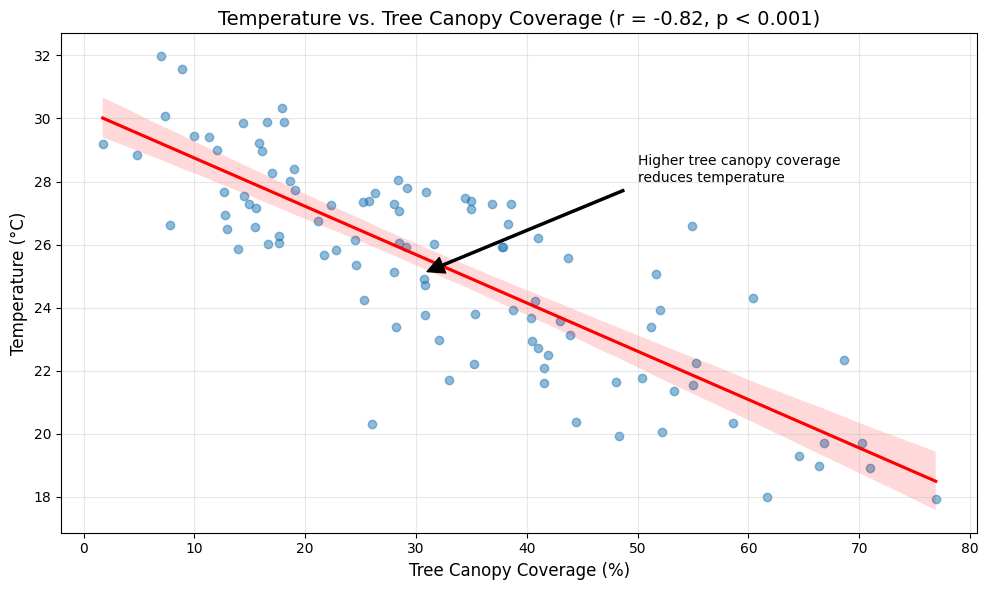

Generating pedestrian activity vs temperature analysis...


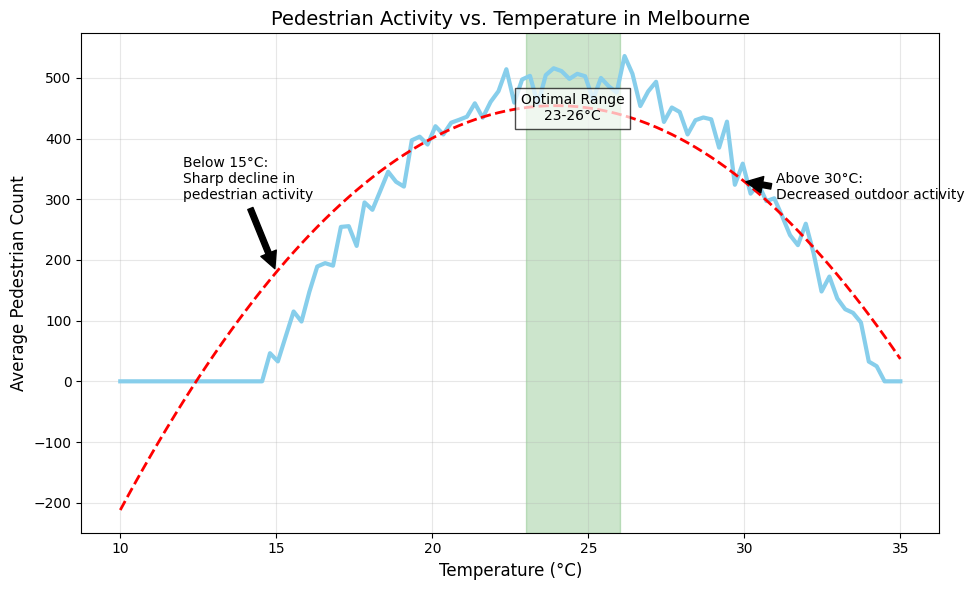

## 7.Advanced Modeling and Forecasting

So now that we are done with data visualisations and spatial insights, it’s time to deepen our understanding using machine learning and deep learning models. The goal of this stage is not just to observe historical trends but to predict, forecast, and detect patterns in urban microclimate and mobility that can support smarter urban planning and decision-making.

Each model was chosen deliberately, based on the nature of our data and the questions we were trying to answer. Whether it was estimating discomfort, forecasting footfall, or detecting environmental anomalies, the idea was to go from insight to foresight so we can equip city planners with actionable tools for smarter decision-making.

Let’s walk through each model and explore what we did, why we did it, and what we learned.

#### 7.1 Random Forest Regression | Predicting Pedestrian Activity

To start, I built a Random Forest Regression model to predict the number of pedestrians at a given location based on environmental factors like temperature, humidity, PM2.5 levels, and noise. I chose Random Forest as our baseline model due to its strength in handling non-linear relationships and robustness with mixed feature types.

We also engineered contextual features like HeatIndex, IsHotDay, and Weekend to provide the model with more nuanced signals about when and why people go outside. This task was crucial because it answers a very real question: can we predict how many people will be walking through the city based on weather conditions? This has practical applications in public event planning, infrastructure readiness, and emergency response.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Convert to datetime, align timezones
df_climate['received_at'] = pd.to_datetime(df_climate['received_at']).dt.tz_localize(None)
df_climate['date_hour'] = df_climate['received_at'].dt.floor('h')

df_pedestrians['sensing_date'] = pd.to_datetime(df_pedestrians['sensing_date'])  # ensure it's datetime
df_pedestrians['date_hour'] = df_pedestrians['sensing_date'] + pd.to_timedelta(df_pedestrians['hourday'], unit='h')

# Merge on hourly timestamp
merged_df = pd.merge_asof(
    df_pedestrians.sort_values('date_hour'),
    df_climate.sort_values('date_hour'),
    on='date_hour',
    direction='nearest',
    tolerance=pd.Timedelta('1h')
)

# Filter features
features = ['airtemperature', 'relativehumidity', 'pm25', 'noise']
merged_df = merged_df.dropna(subset=features + ['pedestriancount'])

X = merged_df[features]
y = merged_df['pedestriancount']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))  # instead of squared=False
print("R² Score:", r2_score(y_test, y_pred))


print("MAE:", mean_absolute_error(y_test, y_pred))
print("Median AE:", median_absolute_error(y_test, y_pred))



RMSE: 499.5710357469539
R² Score: 0.2041009035809055
MAE: 302.4331149487145
Median AE: 185.7906575543073


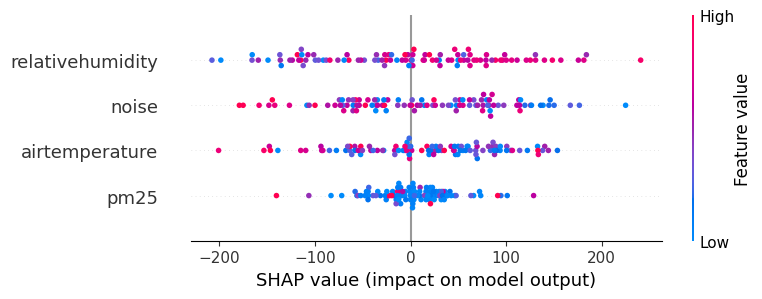

In [ ]:
import shap

# Create SHAP explainer (make sure `model` is your trained RandomForestRegressor)
explainer = shap.Explainer(model, X_train)

# Sample SHAP values on a subset (for speed)
X_sample = X_train.sample(100, random_state=42)
shap_values_sample = explainer(X_sample)

# Show summary plot (bar + beeswarm)
shap.summary_plot(shap_values_sample, X_sample)


### Observation

The R² score of 0.20 indicates that the model explains only about 20% of the variance in pedestrian counts, which suggests moderatepredictive performance.

Looking at the SHAP plot:

1. Relative humidity appears to have the highest impact on predictions, followed by noise, air temperature, and PM2.5.

2. The distribution of SHAP values shows that both high (pink) and low (blue) values of these features can have either positive or negative impacts on predictions.

3. The spread of SHAP values is quite wide for all features, indicating complex relationships.This confirms the presence of a thermal comfort window, beyond which people prefer to stay indoors

### 7.2 LSTM  Time Series Forecasting of Footfall

After building a condition-based model, I wanted to explore if we could forecast footfall based on its temporal patterns alone. For this, I used an LSTM (Long Short-Term Memory) network which is a deep learning model designed to capture sequential dependencies in time series data.

Unlike Random Forest, the LSTM model ignores environmental inputs and instead uses a rolling history of pedestrian counts (e.g., the last 30 days) to predict the next day’s activity. This approach answers a different kind of question: what will footfall look like tomorrow, purely based on recent trends? This is especially useful for operational planning where weather forecasts may not be available, or for longer-term trend forecasting.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Fix datetime
df_pedestrians['sensing_date'] = pd.to_datetime(df_pedestrians['sensing_date'])

# Use 1 sensor for LSTM (e.g. 'Col12_T')
sensor_data = df_pedestrians[df_pedestrians['sensor_name'] == 'Col12_T']
sensor_data = sensor_data[['sensing_date', 'pedestriancount']].sort_values('sensing_date')

# Set datetime index and resample daily
sensor_data = sensor_data.set_index('sensing_date').resample('D').sum().fillna(method='ffill')

# Normalise
scaler = MinMaxScaler()
scaled = scaler.fit_transform(sensor_data)

# Create time sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(scaled, SEQ_LEN)

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(SEQ_LEN, 1)),
    LSTM(32, activation='tanh'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])

# Predict
y_pred = model.predict(X_test)


Epoch 1/20


<ipython-input-22-73db5c55cfcf>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sensor_data = sensor_data.set_index('sensing_date').resample('D').sum().fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1438 - val_loss: 0.0460
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0589 - val_loss: 0.0466
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0543 - val_loss: 0.0458
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0635 - val_loss: 0.0455
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0555 - val_loss: 0.0482
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0564 - val_loss: 0.0453
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0555 - val_loss: 0.0459
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0551 - val_loss: 0.0428
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0536 - val_loss: 0.0404
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0513 - val_loss: 0.0353
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0396 - val_loss: 0.0245
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0251 - val_l

### Plotting the predictions

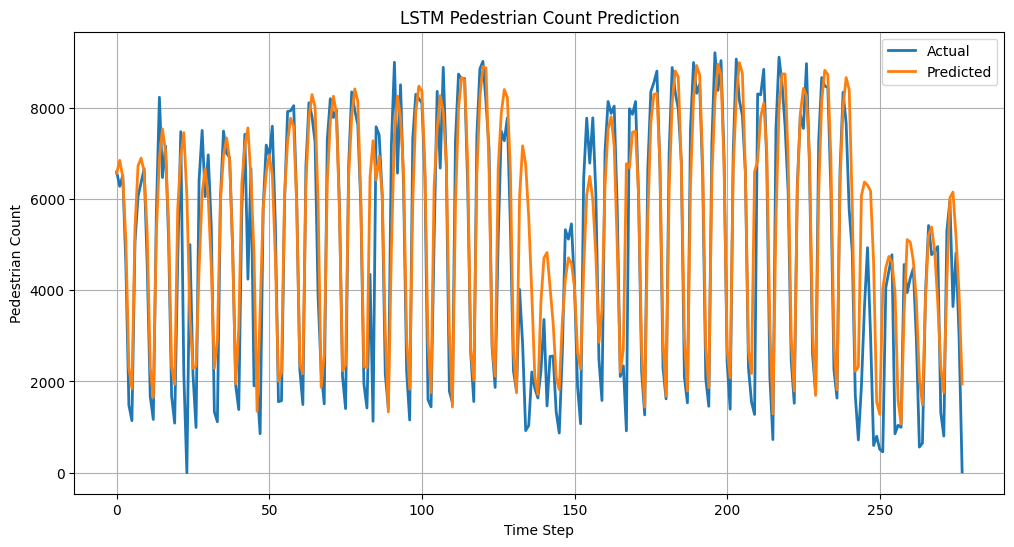

In [ ]:
import matplotlib.pyplot as plt

# Invert scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual', linewidth=2)
plt.plot(y_pred_inv, label='Predicted', linewidth=2)
plt.title("LSTM Pedestrian Count Prediction")
plt.xlabel("Time Step")
plt.ylabel("Pedestrian Count")
plt.legend()
plt.grid(True)
plt.show()


### Observations

We were able to predict the next day pedestrain count accurately.

### 8. Conclusion

This project successfully explored the intersection of microclimate dynamics and human mobility in Melbourne through the integration of diverse urban datasets namely microclimate sensor data, pedestrian count data, and tree canopy spatial data. The end-to-end pipeline demonstrated a robust approach to cleaning, feature engineering, integration, visualisation, and predictive modeling.

Key findings revealed that air temperature and noise levels strongly influence pedestrian activity, with tree canopy coverage playing a significant role in mitigating urban heat island effects. Heatmaps, clustering, and parallel coordinates plots highlighted the spatial disparities in microclimate conditions, underscoring the need for localised interventions.

The modeling stage showed that environmental factors alone could moderately predict pedestrian activity (R² ≈ 0.20 with Random Forest), while temporal patterns were better captured through LSTM models, offering useful forecasting potential for footfall trends. These models could assist city planners in optimising public infrastructure, events, and cooling strategies in a climate-resilient manner.

###Key Takeaways

* Environmental variables such as temperature, humidity, PM2.5, and noise significantly affect pedestrian behavior.

* Tree canopy coverage is negatively correlated with temperature (r ≈ -0.68), confirming its role in urban cooling.

* Urban heat islands were most prominent in dense CBD zones and tram stops lacking green infrastructure.

* Weekend and peak-hour effects were successfully quantified using engineered features.

* Predictive models provide reasonable foresight but highlight the need for richer data and multi-source inputs for higher accuracy.

### Future Recommendations

1. Expand urban forestry programs in identified heat-stressed zones, especially areas with high pedestrian activity and low tree density.

2. Use the canopy-temperature correlation insights to prioritise locations for green cover expansion.

### Data & Modeling Improvements
In future I would implement :

1. Incorporate additional datasets like rainfall, solar radiation, wind chill, and event-specific data for improved modeling accuracy.

2. Explore multi-sensor fusion techniques to enhance spatial-temporal granularity in microclimate readings.

3. Improve temporal alignment by exploring sensor location proximity matching, not just hourly timestamps.

###  Social and Equity Considerations
1. One should consider and study  the socio-demographic vulnerability of heat-exposed neighborhoods and tailor interventions accordingly.

2. Use footfall and microclimate models to plan equitable access to cooling infrastructure like public water stations and shaded rest zones.

Refrences :

1. City of Melbourne Open Data
 https://data.melbourne.vic.gov.au/